# Birdstrikes Jupyter Notebook

Data analysis on the Birdstrikes dataset in a Jupyter notebook.

In [1]:
# Load packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib
%matplotlib inline
import seaborn as sns
from IPython.core.pylabtools import figsize

In [13]:
# Import database and show head

df = pd.read_csv('c:/Users/kszavuly/OneDrive - Microsoft/C+E/Business Analytics/Sample Data/Birdstrikes.csv')
df.head()

C:\Users\kszavuly\AppData\Local\Temp\ipykernel_19564\2670100973.py:3: DtypeWarning: Columns (7,20,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('c:/Users/kszavuly/OneDrive - Microsoft/C+E/Business Analytics/Sample Data/Birdstrikes.csv')


,Airport: Name,Altitude bin,Aircraft: Make/Model,Effect: Impact to flight,FlightDate,Record ID,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,Wildlife: Size,Wildlife: Species,When: Time (HHMM),When: Time of day,Pilot warned of birds or wildlife?,Cost: Aircraft time out of service (hours),Cost: Other (inflation adj),Cost: Repair (inflation adj),Cost: Total $,Miles from airport,Feet above ground,Speed (IAS) in knots
0,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,A-319,NaN,1/1/2005 0:00,227413,No damage,2.0,NORTHWEST AIRLINES,Michigan,Climb,Medium,Unknown bird - medium,NaN,NaN,NaN,NaN,0,0,0,NaN,400,NaN
1,DANE COUNTY REGIONAL ARPT-TRUAX FLD,< 1000 ft,A-320,NaN,1/1/2005 0:00,226578,No damage,2.0,NORTHWEST AIRLINES,Wisconsin,Take-off run,Medium,Unknown bird - medium,NaN,NaN,NaN,NaN,0,0,0,0.0,0,NaN
2,HOGUE ARPT,< 1000 ft,PA-46 MALIBU,NaN,1/1/2005 0:00,268383,Caused damage,1.0,PRIVATELY OWNED,Tennessee,Landing Roll,Large,White-tailed deer,NaN,Day,NaN,NaN,0,0,0,0.0,0,20
3,SACRAMENTO INTL,< 1000 ft,B-737-300,NaN,1/1/2005 0:00,229514,Caused damage,2.0,SOUTHWEST AIRLINES,California,Approach,Large,Greater white-fronted goose,2140.0,Night,Y,NaN,0,"117,135","117,135",NaN,500,142
4,GUARULHOS INTL,< 1000 ft,B-767-300,NaN,1/1/2005 0:00,225661,No damage,2.0,UNITED AIRLINES,NaN,Landing Roll,Medium,Unknown bird - medium,NaN,NaN,NaN,NaN,0,0,0,0.0,0,NaN


In [14]:
df.shape

(65610, 23)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65610 entries, 0 to 65609
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Airport: Name                               65601 non-null  object 
 1   Altitude bin                                65610 non-null  object 
 2   Aircraft: Make/Model                        65610 non-null  object 
 3   Effect: Impact to flight                    3269 non-null   object 
 4   FlightDate                                  65610 non-null  object 
 5   Record ID                                   65610 non-null  int64  
 6   Effect: Indicated Damage                    65610 non-null  object 
 7   Aircraft: Number of engines?                42766 non-null  object 
 8   Aircraft: Airline/Operator                  65610 non-null  object 
 9   Origin State                                59163 non-null  object 
 10  When: Phas

In [28]:
# Convert appropriate object dtype columns to numerical columns
numerical_columns = ['Aircraft: Number of engines?', 'Cost: Aircraft time out of service (hours)', 'Cost: Other (inflation adj)', 'Cost: Repair (inflation adj)' 'Cost: Total $', 'Feet above ground']
def clean_and_convert_to_float(column):
     column_numeric = pd.to_numeric(column, errors='coerce')
     column_filled = column_numeric.fillna(0)
     return column_filled.astype(float)
for col in numerical_columns:
    if col in df.columns:
      df[col] = clean_and_convert_to_float(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65610 entries, 0 to 65609
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Airport: Name                               65601 non-null  object 
 1   Altitude bin                                65610 non-null  object 
 2   Aircraft: Make/Model                        65610 non-null  object 
 3   Effect: Impact to flight                    3269 non-null   object 
 4   FlightDate                                  65610 non-null  object 
 5   Record ID                                   65610 non-null  int64  
 6   Effect: Indicated Damage                    65610 non-null  object 
 7   Aircraft: Number of engines?                65610 non-null  float64
 8   Aircraft: Airline/Operator                  65610 non-null  object 
 9   Origin State                                59163 non-null  object 
 10  When: Phas

In [22]:
# Display all columns with describe
pd.set_option('display.max_columns', None)
df.describe()

,Record ID,Aircraft: Number of engines?,When: Time (HHMM),Cost: Aircraft time out of service (hours),Cost: Total $,Feet above ground
count,65610.000000,65610.000000,36636.000000,65610.000000,65610.000000,65610.000000
mean,246208.681116,1.341381,1389.074271,2.022481,2.721262,42.883295
std,80226.508941,1.045839,613.410508,27.217270,35.090378,136.720857
min,9005.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,240765.250000,0.000000,915.000000,0.000000,0.000000,0.000000
50%,257226.500000,2.000000,1410.000000,0.000000,0.000000,0.000000
75%,303635.750000,2.000000,1930.000000,0.000000,0.000000,0.000000
max,322935.000000,4.000000,2359.000000,984.000000,984.000000,995.000000


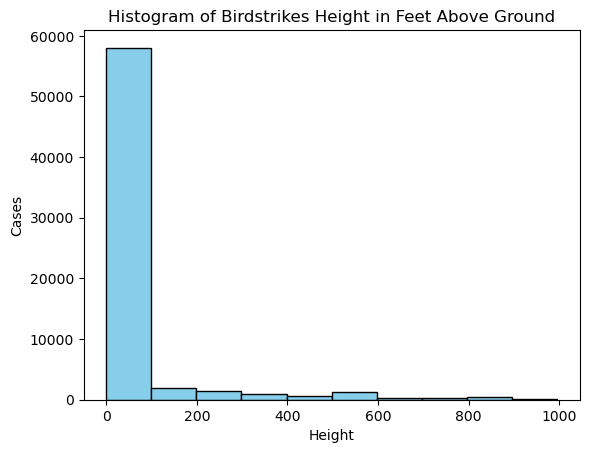

In [27]:
# Histogram

plt.hist(df['Feet above ground'], color = 'skyblue', edgecolor = 'black',
         bins = int(10))
plt.title('Histogram of Birdstrikes Height in Feet Above Ground')
plt.xlabel('Height'); plt.ylabel('Cases');